## Sector Analysis

In [8]:
import numpy as np  
import pandas as pd  
from datetime import timedelta
from pandas_datareader import data as wb  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [9]:
timelines = pd.read_csv('C:/Users/jayan/OneDrive/Documents/GitHub/Pandemic-stock-analysis/pandemics_timelines.csv').dropna()
for col in timelines.columns[1:]:
    timelines[col] = pd.to_datetime(timelines[col])
timelines

,pandemic_name,first_case,who_emergency,pandemic_declaration,last_date
0,covid19,2019-11-17,2020-01-30,2020-03-11,2020-07-31
1,SARS,2002-11-16,2003-03-26,2003-03-26,2003-07-05
2,Swine Flu,2009-04-15,2009-04-25,2009-06-11,2010-08-11
3,Hong Kong Flu,1968-07-01,1968-09-30,1968-09-30,1970-12-31
4,Asian Flu,1957-02-28,1957-06-30,1957-06-30,1958-12-31
5,EBOLA,2013-12-01,2014-08-08,2014-08-08,2016-01-14
6,WWII,1939-09-01,1939-09-01,1939-09-01,1945-09-02


In [10]:
def plot_cumulative_returns(data,tl):
    data_cum_ret = (data.pct_change()+1).cumprod()
    data_cum_ret.plot(figsize=(10,7),grid=True)
    plt.legend(loc='best')
    plt.ylabel('Cumulative Returns')
    plt.axvline(x=tl.first_case.iloc[0],color='RoyalBlue',linestyle='dashdot',linewidth=3)
    plt.axvline(x=tl.who_emergency.iloc[0],color='Red',linestyle='dashdot',linewidth=3)
    plt.axvline(x=tl.pandemic_declaration.iloc[0],color='LightSeaGreen',linestyle='dashdot',linewidth=3)
    plt.axvspan(tl.last_date.iloc[0], tl.last_date.iloc[0]+timedelta(days=365),color='dodgerblue', alpha=0.2)
    plt.show()

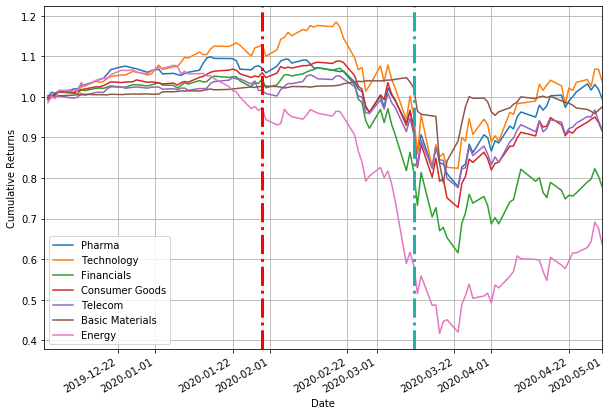

In [13]:
covid_timelines = timelines.loc[timelines.pandemic_name=='covid19']
def plot_sector(tl):
    sector_list = ['IHE', 'IYW', 'IYF', 'IYK', 'IYZ','ITM', 'IYE']

    columns = ['Pharma', 'Technology', 'Financials', 'Consumer Goods',
               'Telecom', 'Basic Materials', 'Energy']

    sector_data = pd.DataFrame()
    for inst in sector_list:
        try:
            sector_data[inst] = wb.DataReader(inst, data_source =  'yahoo', start='2019-12-1', end = '2020-5-1')['Adj Close']  
                                           
        except:
            pass

    sector_data.columns = columns
    plot_cumulative_returns(sector_data, tl)
plot_sector(covid_timelines)

One observation from this graph is that you can see Pharma and Technology are two sectors which are relatively less impacted. In the graph above, Technology is this orange line which you can see at the very top which is followed by Pharma as the blue line. Overall, you can see that all the sectors are in the same direction but the relative magnitude, or the fall, is different.

You can see the pink line representing energy as the most impacted. This is logical considering we have seen earlier how crude oil was the most impacted, which in turn impacted the energy sector since they both are directly related. Another observation is the green line, which indicates financials, has also fallen. The reason for this is that whenever the economy slows down there are a lot of loan defaults which result in the rise of non-performing assets for a bank and eventually they will take a hit on their Profit and loss statement.